In [ ]:
#Importing the Libraries
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
all_data = pd.read_csv("HDFCBANK.csv")
all_data=all_data.drop(['Date','Trades','Deliverable Volume','%Deliverble','Symbol','Series'],axis=1)
all_data.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11
1,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12
2,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12
3,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12
4,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12


In [ ]:

Close_list = all_data['Close'].tolist()
total=len(Close_list);

In [ ]:
j=0
j=0
D1=[]
D2=[]
D3=[]
D4=[]
D5=[]
D6=[]
D7=[]
D8=[]
D9=[]
D10=[]
DIFF=[]
PERCDIFF=[]
TARGET=[]
counter=0
for i in range(0,total):
  D1.append(Close_list[j+counter])
  D2.append(Close_list[j+counter+1])
  D3.append(Close_list[j+counter+2])
  D4.append(Close_list[j+counter+3])
  D5.append(Close_list[j+counter+4])
  D6.append(Close_list[j+counter+5])
  D7.append(Close_list[j+counter+6])
  D8.append(Close_list[j+counter+7])
  D9.append(Close_list[j+counter+8])
  D10.append(Close_list[j+counter+9])
  diff=Close_list[j+counter+9]-Close_list[j+counter+8]
  DIFF.append(diff)
  percdiff=(diff*100)/Close_list[j+counter+9]
  PERCDIFF.append(percdiff)
  if(percdiff>1.0):
    TARGET.append('pos')
  elif(percdiff<-1.0):
    TARGET.append('neg')
  else:
    TARGET.append('neu')
  j=j+1;
  if(j==total-(counter+9)):
    break

In [ ]:
df1=pd.DataFrame(D1)
df2=pd.DataFrame(D2)
df3=pd.DataFrame(D3)
df4=pd.DataFrame(D4)
df5=pd.DataFrame(D5)
df6=pd.DataFrame(D6)
df7=pd.DataFrame(D7)
df8=pd.DataFrame(D8)
df9=pd.DataFrame(D9)
df10=pd.DataFrame(D10)
df11=pd.DataFrame(DIFF)
df12=pd.DataFrame(PERCDIFF)
df13=pd.DataFrame(TARGET)
df=pd.DataFrame()
df['Close']=all_data['Close']
df['D1']=df1
df['D2']=df2
df['D3']=df3
df['D4']=df4
df['D5']=df5
df['D6']=df6
df['D7']=df7
df['D8']=df8
df['D9']=df9
df['D10']=df10
df['DIFF']=df11
df['PERCDIFF']=df12
df['TARGET']=df13
df.dropna(inplace=True)
df.head(10)

,Close,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,DIFF,PERCDIFF,TARGET
0,293.50,293.50,304.05,292.80,296.45,286.55,287.20,283.85,285.60,283.85,286.55,2.70,0.942244,neu
1,304.05,304.05,292.80,296.45,286.55,287.20,283.85,285.60,283.85,286.55,302.20,15.65,5.178690,pos
2,292.80,292.80,296.45,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,3.55,1.161079,pos
3,296.45,296.45,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,305.25,-0.50,-0.163800,neu
4,286.55,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,305.25,291.35,-13.90,-4.770894,neg
5,287.20,287.20,283.85,285.60,283.85,286.55,302.20,305.75,305.25,291.35,299.55,8.20,2.737439,pos
6,283.85,283.85,285.60,283.85,286.55,302.20,305.75,305.25,291.35,299.55,293.05,-6.50,-2.218052,neg
7,285.60,285.60,283.85,286.55,302.20,305.75,305.25,291.35,299.55,293.05,303.15,10.10,3.331684,pos
8,283.85,283.85,286.55,302.20,305.75,305.25,291.35,299.55,293.05,303.15,316.60,13.45,4.248263,pos
9,286.55,286.55,302.20,305.75,305.25,291.35,299.55,293.05,303.15,316.60,324.40,7.80,2.404439,pos


In [ ]:
df0=pd.DataFrame()
df['TARGET']= np.where(df['TARGET']=='pos','1',(np.where(df['TARGET']=='neg','-1','0')))

df.head()
df.groupby('TARGET').size()

,Close,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,DIFF,PERCDIFF,TARGET
0,293.50,293.50,304.05,292.80,296.45,286.55,287.20,283.85,285.60,283.85,286.55,2.70,0.942244,0
1,304.05,304.05,292.80,296.45,286.55,287.20,283.85,285.60,283.85,286.55,302.20,15.65,5.178690,1
2,292.80,292.80,296.45,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,3.55,1.161079,1
3,296.45,296.45,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,305.25,-0.50,-0.163800,0
4,286.55,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,305.25,291.35,-13.90,-4.770894,-1


TARGET
-1    1476
0     2512
1     1580
dtype: int64

#Explore the class distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'TARGET')

Text(0.5, 1.0, 'Number of positive negative and neutral messages')

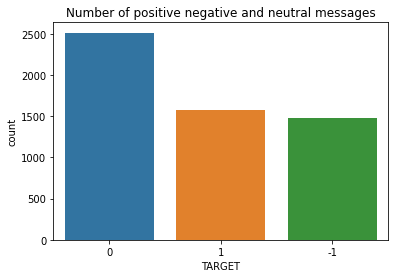

In [ ]:
sns.countplot(df['TARGET'])
plt.xlabel('TARGET')
plt.title('Number of positive negative and neutral messages')

In [ ]:
#DUMMY CODING USING THE LOOP STRUCTURE
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=pd.Categorical(df[col]).codes
df.head(5)

,Close,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,DIFF,PERCDIFF,TARGET
0,293.50,293.50,304.05,292.80,296.45,286.55,287.20,283.85,285.60,283.85,286.55,2.70,0.942244,1
1,304.05,304.05,292.80,296.45,286.55,287.20,283.85,285.60,283.85,286.55,302.20,15.65,5.178690,2
2,292.80,292.80,296.45,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,3.55,1.161079,2
3,296.45,296.45,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,305.25,-0.50,-0.163800,1
4,286.55,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,305.25,291.35,-13.90,-4.770894,0


In [ ]:
features = ['D1','D2','D3','D4','D5','D6','D7','D8']
output_var=df['TARGET']
df1=df[features]

In [ ]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df1[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform)
feature_transform.head()

,D1,D2,D3,D4,D5,D6,D7,D8
0,0.003332,0.006974,0.003090,0.004350,0.000932,0.001157,0.000000,0.000604
1,0.006974,0.003090,0.004350,0.000932,0.001157,0.000000,0.000604,0.000000
2,0.003090,0.004350,0.000932,0.001157,0.000000,0.000604,0.000000,0.000932
3,0.004350,0.000932,0.001157,0.000000,0.000604,0.000000,0.000932,0.006336
4,0.000932,0.001157,0.000000,0.000604,0.000000,0.000932,0.006336,0.007561


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc0278ade10>)

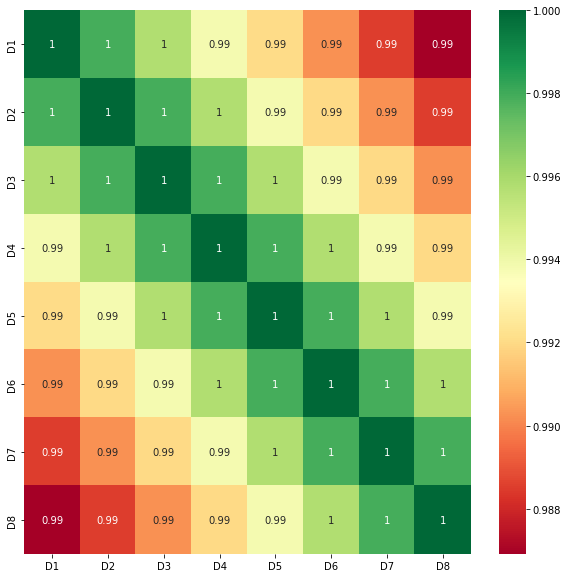

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.subplots(figsize=(10,10))
sns.heatmap(feature_transform.corr(),cmap='RdYlGn',annot=True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(5).fit(feature_transform)
str(pca.explained_variance_ratio_.sum())

'0.9995460049969255'

In [ ]:
pca_df=pd.DataFrame(pca.components_,columns=feature_transform.columns)
pca_df

,D1,D2,D3,D4,D5,D6,D7,D8
0,0.353064,0.353531,0.353828,0.353965,0.353941,0.353761,0.353419,0.352915
1,0.481071,0.420487,0.285408,0.100753,-0.100814,-0.285445,-0.420611,-0.481245
2,0.456143,0.198284,-0.186017,-0.466842,-0.466946,-0.186114,0.198110,0.456234
3,0.418473,-0.079458,-0.488331,-0.283038,0.282778,0.488406,0.079634,-0.418503
4,0.364526,-0.358617,-0.348051,0.342380,0.342600,-0.347615,-0.359147,0.364629


In [ ]:
#transformed features,instead of having 8,we have 5 now.this can now be plugged into any further modelling work
x_scaled_transf=pca.fit_transform(feature_transform)
x_scaled_transf=pd.DataFrame(x_scaled_transf,columns=('P1','P2','P3','P4','P5'))
x_scaled_transf.head()

,P1,P2,P3,P4,P5
0,-1.028859,0.006046,-0.001131,-0.001215,-0.000995
1,-1.030039,0.006524,0.001076,0.000769,0.000158
2,-1.032175,0.003982,0.000819,0.000179,-0.000493
3,-1.031032,0.000218,0.003694,-0.001115,0.002771
4,-1.029897,-0.004669,0.003851,-0.001968,0.000029


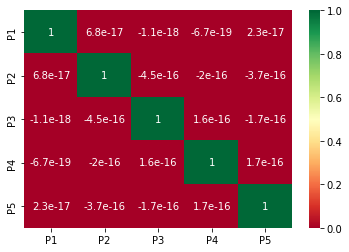

In [ ]:
correlation=x_scaled_transf.corr()
sns.heatmap(correlation,cmap="RdYlGn",annot=True)
plt.show()

In [ ]:
output_var.head()

0    1
1    2
2    2
3    1
4    0
Name: TARGET, dtype: int8

In [ ]:
# separate into train and test sets
train_x,test_x,train_y,test_y=train_test_split(x_scaled_transf,output_var,test_size=0.20,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(4454, 5) (1114, 5) (4454,) (1114,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=8)

In [ ]:
model.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
predicted_values=model.predict(test_x)
predicted_values

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

# **ACCURACY SCORE-K Neighbors Classifier**

In [ ]:
#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,predicted_values))

ACCUIRACY SCORE
0.4245960502692998


In [ ]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,predicted_values))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.32      0.25      0.28       313
           1       0.50      0.67      0.57       521
           2       0.27      0.17      0.21       280

    accuracy                           0.42      1114
   macro avg       0.36      0.36      0.35      1114
weighted avg       0.39      0.42      0.40      1114



CONFUSION MATRIX


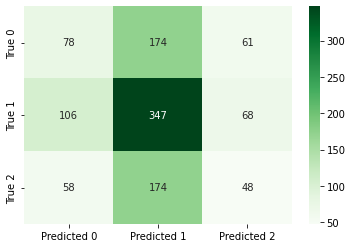

In [ ]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,predicted_values)
lbl1=["Predicted 0","Predicted 1","Predicted 2"]
lbl2=["True 0","True 1","True 2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(train_x, train_y)

XGBClassifier(objective='multi:softprob')

In [ ]:
# make predictions for test data
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]


# **ACCURACY SCORE-XGB Classifier**




In [ ]:
#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,predictions))

ACCUIRACY SCORE
0.47666068222621183


In [ ]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,predictions))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.40      0.08      0.13       313
           1       0.49      0.90      0.64       521
           2       0.37      0.14      0.20       280

    accuracy                           0.48      1114
   macro avg       0.42      0.37      0.32      1114
weighted avg       0.44      0.48      0.38      1114



CONFUSION MATRIX


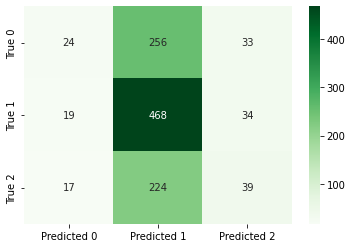

In [ ]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,predictions)
lbl1=["Predicted 0","Predicted 1","Predicted 2"]
lbl2=["True 0","True 1","True 2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [1]:
!jupyter nbconvert HDFCpercdiff_1_0_SMP_KNN_XGBoost.ipynb

[NbConvertApp] Converting notebook HDFCpercdiff_1_0_SMP_KNN_XGBoost.ipynb to html
[NbConvertApp] Writing 450984 bytes to HDFCpercdiff_1_0_SMP_KNN_XGBoost.html
